In [1]:
import pandas as pd
import geopandas as gp
import numpy as np 
import os
import fiona
from statistics import mean, median
import string

# VEST CT 2020
---

## VEST Documentation

### Sources

#### Election Results
Election results from the Connecticut Secretary of State (https://portal.ct.gov/SOTS/Election-Services/Election-Results/Election-Results).

#### Shapefiles
Precinct shapefile from the U.S. Census Bureau's 2020 Redistricting Data Program.

### Processing
District splits not reported separately were merged for Bethel 5, Bridgeport 129-3, 130-2, Durham 3, East Haven 3-3, Hartford 11, 12, 24, Naugatuck 3-3, New Britain 12, New Haven 9-2, 17, 21-1, Stamford 3, 5, 6-1, 8, 12, 20-1, 21, Torrington 6, 7, Waterbury 74-5.

The Stratford and Westport precincts were renumbered from municipal districts to state/federal districts.

The following additional modifications were made to match the 2020 precinct boundaries.

Ansonia: Adjust 1/2 to match shapefile
Avon: Adjust 1/3 to match street list
Berlin: Adjust 2/5 to match voter file
Bethel: Adjust 1/4 to match voter file
Bridgeport: Adjust 124-2/3/4, 126-1/2/5, 130-3/4 to match PDF
Colchester: Adjust 1/3, 2/4 to match street list
Coventry: Adjust 1/2 to match street list
Danbury: Align wards 4/5, 6/7 with PDF
Darien: Split 5/4-1, adjust 1/6 to match 2019 redistricting map
East Hartford: Adjust 1/2, 5/6 to match street list
East Haven: Add 1-3, 5-3 to match street list; Align 3, 3-3 with LD
East Windsor: Align 1, 1-2 with LD
Enfield: Adjust 258/458 to match PDF
Fairfield: Split 3-32/3-34 by LD; Adjust 8/9 to match PDF
Glastonbury: Adjust 4/5, 4/9, 7/9 to match PDF
Greenwich: Split 10/10-1 by LD; Adjust 1/2/3 to match PDF
Guilford: Adjust 1/3, 2/3 to match descriptions
Haddam: Adjust 1/2 to match street list
Hamden: Adjust 1/9, 5/6 to match PDF
Killingly: Merge 1/3/5, 2-1/4-1, 2-2/4-2
Ledyard: Adjust 1/2 to match street list
Litchfield: Adjust 2/4 to match voter file
Manchester: Adjust 3/5 to match street list
Middletown: Adjust 1/12 to match GIS
Milford: Align 117/119, 119-1/3 with LD and PDF
New Britain: Adjust 12/14 to match voter file
New Haven: Split 11-1/11-3 and align VTDs with voter file
New Milford: Align all VTDs with voter file
Newtown: Adjust 1/2 to match street list
Norwich: Adjust 4/5 to match voter file
Plainfield: Adjust 1/3, 2/4 to match voter file
Ridgefield: Adjust 1/2, 1/3 to match voter file
Rocky Hill: Adjust 2/3 to match voter file
Seymour: Adjust 1/3, 2/3 to match voter file
Shelton: Adjust 1/4, 2/3 to match PDF, voter file
Simsbury: Align 1/2 with 2017 redistricting
South Windsor: Adjust 3/5, 4/5 to match PDF
Southbury: Align all VTDs with shapefile, street list
Southington: Adjust 3/6, 5/8, 8/9 to match PDF
Stafford: Adjust 1/2 to match PDF
Stamford: Adjust 6/13 to match PDF
Stonington: Align all VTDs with shapefile
Stratford: Split 20-1/13, 80-1/21 by LD; Align VTDs with voter file
Vernon: Adjust 1/2, 2/3 to match PDF
Wallingford: Adjust 2/3, 2/4, 7/8 to match voter file
Waterbury: Align VTDs with PDF, street list, voter file
West Haven: Adjust 1/7, 4/5/6, 8/9/10 to match voter file
Weston: Adjust 1/2 to match voter file
Windham: Adjust 4/6 to match street list
Windsor: Adjust 1/3 to match street list
Wolcott: Adjust 1/2, 1/3 to match voter file

### Races
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRERTRU - Donald J. Trump (Republican Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party of Delaware)  
G20PREOWRI - Write-in Votes  

## Election Result Processing

### Load in VEST file

In [2]:
vest_ct_20 = gp.read_file("./raw-from-source/VEST/ct_2020/ct_2020.shp")

In [3]:
print(vest_ct_20.head())

  STATEFP20 COUNTYFP20              NAME20  G20PREDBID  G20PRERTRU  \
0        09        011    Montville 004-00        1486        1547   
1        09        005  Barkhamsted 001-00        1154        1228   
2        09        005    Bethlehem 001-00         937        1393   
3        09        005  Bridgewater 001-00         667         549   
4        09        005       Canaan 001-00         437         209   

   G20PRELJOR  G20PREGHAW  G20PREOWRI  \
0          67          10           0   
1          42          16           2   
2          21          15           1   
3          10           7           0   
4           6           2           1   

                                            geometry  
0  POLYGON ((-72.22762 41.51870, -72.22757 41.518...  
1  POLYGON ((-73.05268 41.89076, -73.05217 41.892...  
2  POLYGON ((-73.26145 41.66464, -73.25791 41.664...  
3  POLYGON ((-73.40474 41.53702, -73.40457 41.537...  
4  POLYGON ((-73.37304 41.96030, -73.37296 41.960...  


<AxesSubplot:>

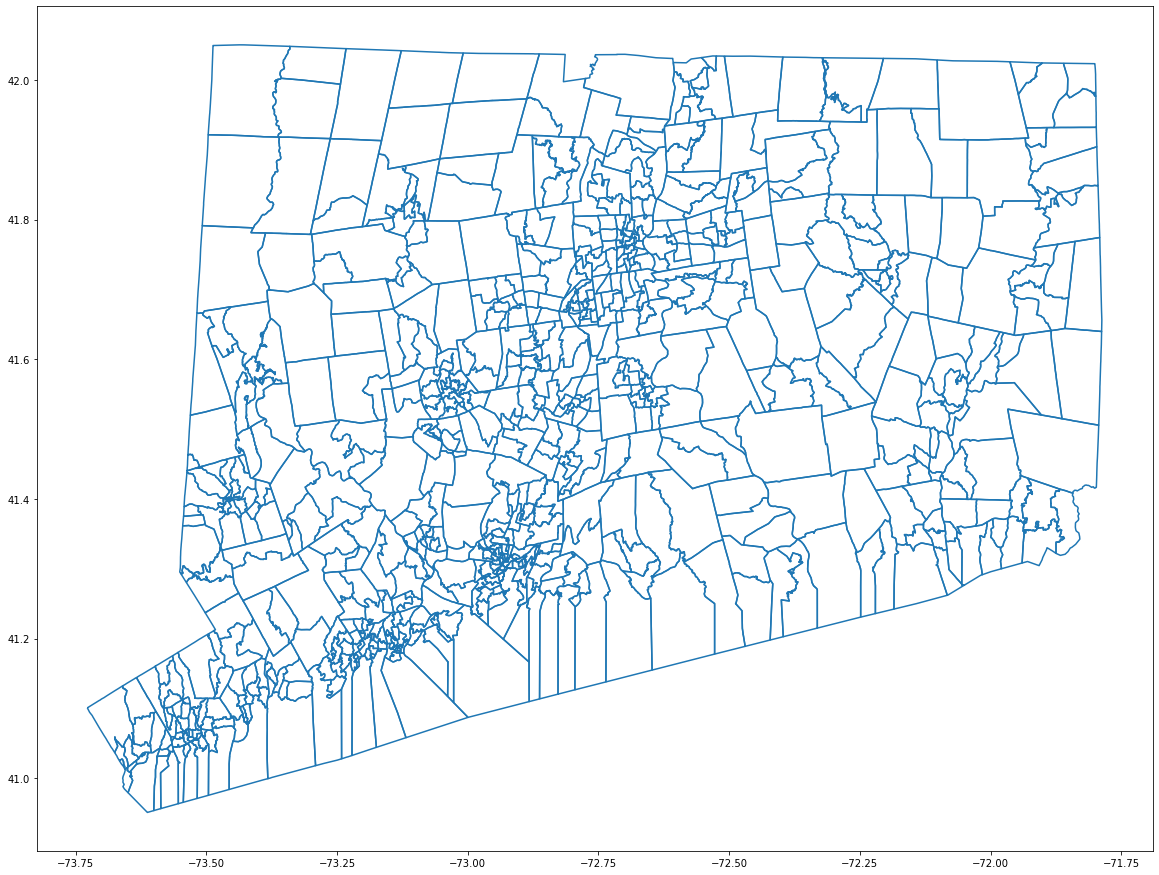

In [6]:
vest_ct_20.boundary.plot(figsize=(20,20))

In [10]:
election_results = pd.read_excel("./raw-from-source/Election_Results/PresidentialElection.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: './raw-from-source/Election_Results/PresidentialElection.xlsx'